Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# Project PETROBRAS (2018/00147-5): 
## Attenuation of dynamic loading along mooring lines embedded in clay

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
Porto Alegre, RS, Brazil 
___

[1.   Introduction](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/01_Introduction.ipynb?flush_cache=true)  
[2.   Reduced model scaling](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/02_Reduced_model.ipynb?flush_cache=true)  
[3.   Typical soil](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/03_Typical_soil.ipynb?flush_cache=true)  
[4.   The R4 studless 120mm chain](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/04_R4_studless_chain.ipynb?flush_cache=true)  
[5.   Dynamic load definition](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/05_Dynamic_load.ipynb?flush_cache=true)  
[6.   Design of chain anchoring system](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/06_Chain_anchor.ipynb?flush_cache=true)  
[7.   Design of uniaxial load cell with inclinometer](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/07_Load_cell.ipynb?flush_cache=true)  


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing "pandas dataframe" with a sample CPTU test at the experimental field
CPTU = pd.read_excel('resources/CPTU223.xlsx', sheet_name='CPTU')
#print(CPTU)

### 3. Typical soil

The typical soil undrained shear resistance has been already provided by Petrobras
as presented in the figure below:

<img src="resources/Typical_soil.png" alt= "In situ soil tests" width="400">

From this figure, it may be conclude that at some arbitrary depth we have:

$$ s_{\rm u} \approx 1.4z$$

with $z$ in meters from soil surface downwards and $s_{\rm u}$ in kPa. 

A preliminary soil profiling at the intended testing site has provided the 
$s_{\rm u}$ data below:


Soil s_u profile angular coefficient:  1.97z  (m)  
Soil s_u at surface (z = 0):           4.18 (kPa)


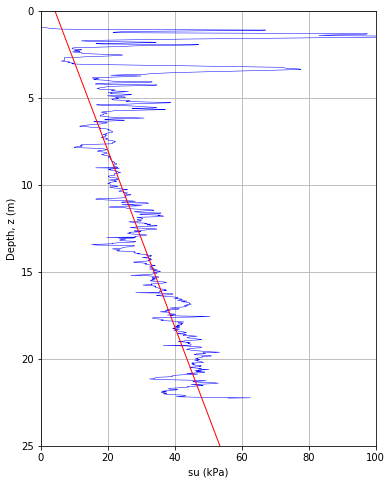

In [2]:
z    = -CPTU.z
Su   =  CPTU.Su

kz   =  z > 6.0
pSu  =  np.polyfit(z[kz], Su[kz], 1)
zi   =  np.linspace(0, 25, 100)
Sui  =  np.polyval(pSu,zi)

fig1 =  plt.figure(1, figsize=[6,8])

plt.plot(Su,  z,  lw=0.5, color='blue')
plt.plot(Sui, zi, lw=1.0, color='red')
plt.axis([0, 100, 0, 25])
plt.gca().invert_yaxis()
plt.xlabel('su (kPa)')
plt.ylabel('Depth, z (m)')
plt.grid(True)

print('Soil s_u profile angular coefficient: {0:5.2f}z  (m)  '.format(pSu[0]))
print('Soil s_u at surface (z = 0):          {0:5.2f} (kPa)'.format(pSu[1]))

The linear fitting above (considering only data beyond 6m depth) shows that the
testing site presents an $s_{\rm u}$ profile such that:

$$ s_{\rm u} \approx 2.0z$$

what is somehow above the seabed resistance. For designing the experiment and
dimensioning all testint apparatus, this larger resistance must be taken into account.
It implies, for instance, that the chain load required for catenary formation will
be 40% larger than expected from the scales calculation in [section 2](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/02_Reduced_model.ipynb?flush_cache=true).
